In [1]:
# This notebook uses IEX's sandbox environment with unlimited monthly queries.

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [3]:
import os
import requests

In [4]:
import env

credentials loaded successfully


In [5]:
import pyEX as p 

In [6]:
c = p.Client(api_token = env.token, version = 'stable')

In [7]:
import iexfinance as iex

In [8]:
os.environ['IEX_API_VERSION'] = 'iexcloud-sandbox'

In [9]:
os.environ['IEX_TOKEN'] = env.sandbox_token

In [10]:
from iexfinance.stocks import get_historical_data

In [11]:
now = datetime.date.today()
now

datetime.date(2021, 1, 26)

In [12]:
start = datetime.datetime(2017, 1, 1)
end = now

In [13]:
spy = get_historical_data("SPY", start, end, output_format = 'pandas')

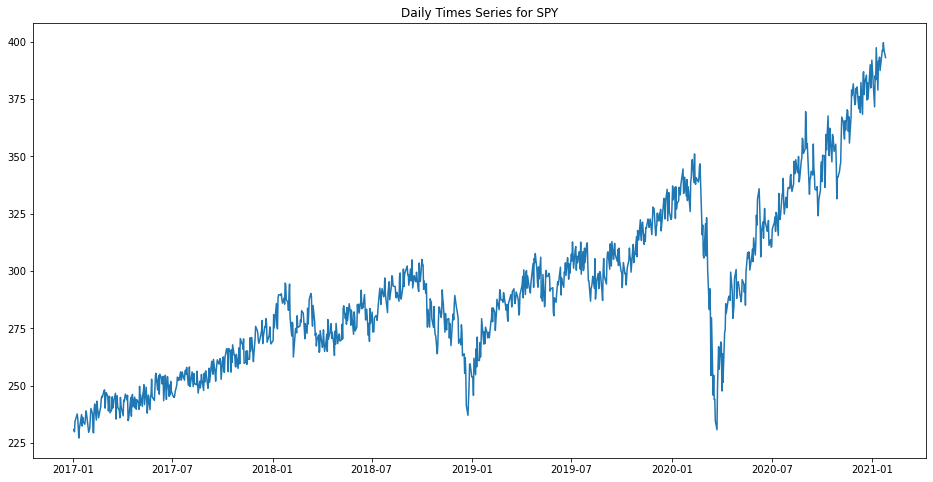

In [14]:
plt.figure(figsize = (16, 8))
plt.plot(spy.index, spy['close'])
plt.title("Daily Times Series for SPY")
plt.show()

In [15]:
tsla = get_historical_data("TSLA", start, end, output_format = 'pandas')

In [16]:
tsla

,open,high,low,close,volume
date,,,,,
2017-01-03,44.898,46.0760,42.4200,45.360,30785286
2017-01-04,43.260,47.2000,43.1740,46.158,56699564
2017-01-05,46.639,47.5080,45.3800,47.410,30348404
2017-01-06,46.587,47.4760,47.3100,47.813,28347913
2017-01-09,46.344,48.1730,46.6000,47.376,20005126
...,...,...,...,...,...
2021-01-19,844.400,886.0000,836.0000,871.000,26146185
2021-01-20,880.480,863.2000,873.2300,876.090,26217412
2021-01-21,882.000,860.3142,842.9283,850.990,21020086


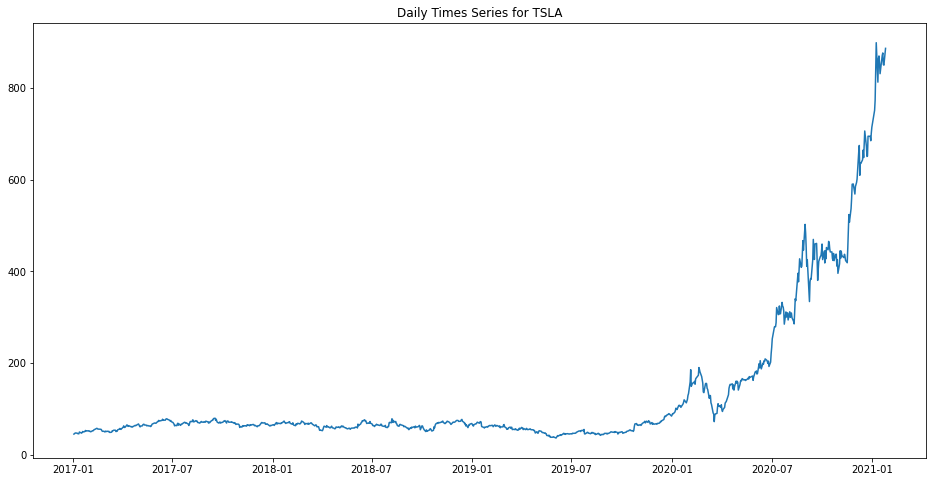

In [17]:
plt.figure(figsize = (16, 8))
plt.plot(tsla.index, tsla['close'])
plt.title("Daily Times Series for TSLA")
plt.show()

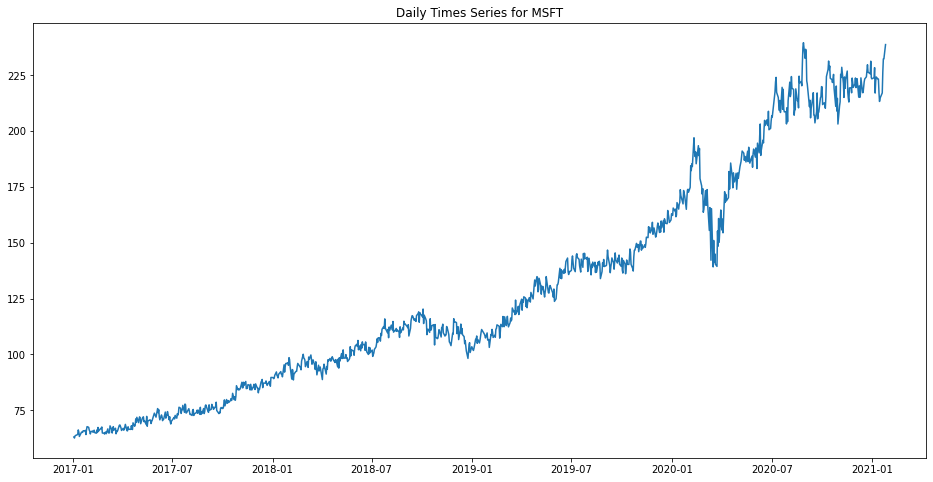

In [18]:
# Creating a function for this process:

msft = get_historical_data("MSFT", start, end, output_format = 'pandas')

plt.figure(figsize = (16, 8))
plt.plot(msft.index, msft['close'])
plt.title("Daily Times Series for MSFT")
plt.show()

In [19]:
def get_stock_chart(ticker, start_date, end_date, output_format = 'pandas'):
    
    '''This function will take the inputs from the user as to ticker, start date, end date, and default output format
    and return a chart with the requested stock/ticker.'''
    
    ticker = get_historical_data(str(ticker), start_date, end_date, output_format = 'pandas')
    plt.figure(figsize = (16, 8))
    plt.plot(ticker.index, ticker['close'])
    plt.title(f"Daily Times Series for {ticker}")
    plt.show()
    

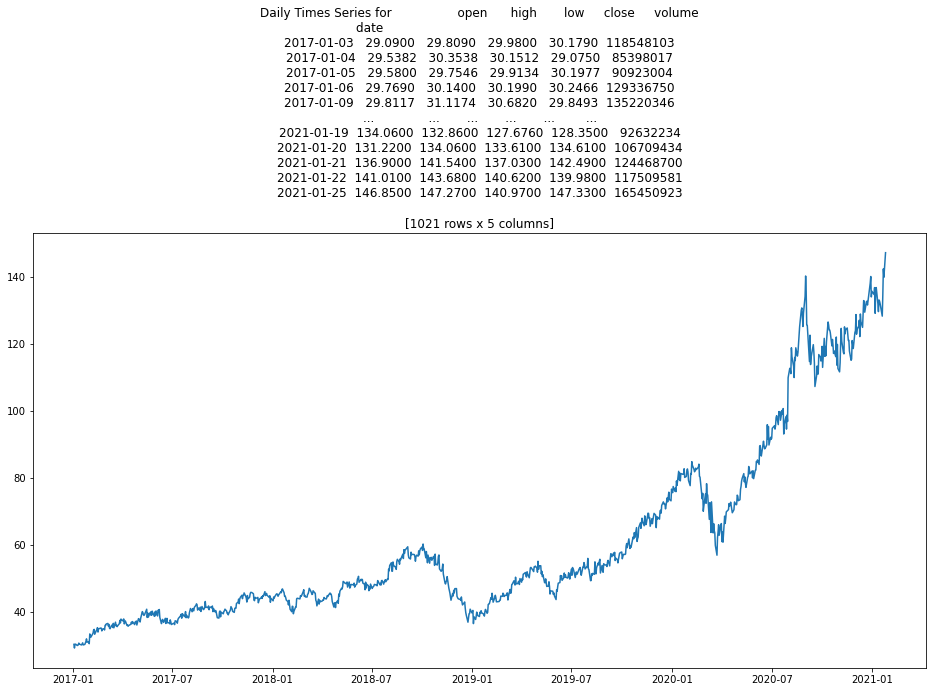

In [20]:
get_stock_chart("AAPL", start, end)

In [21]:
# Now adding user inputs:

In [22]:
# starting = datetime(input())

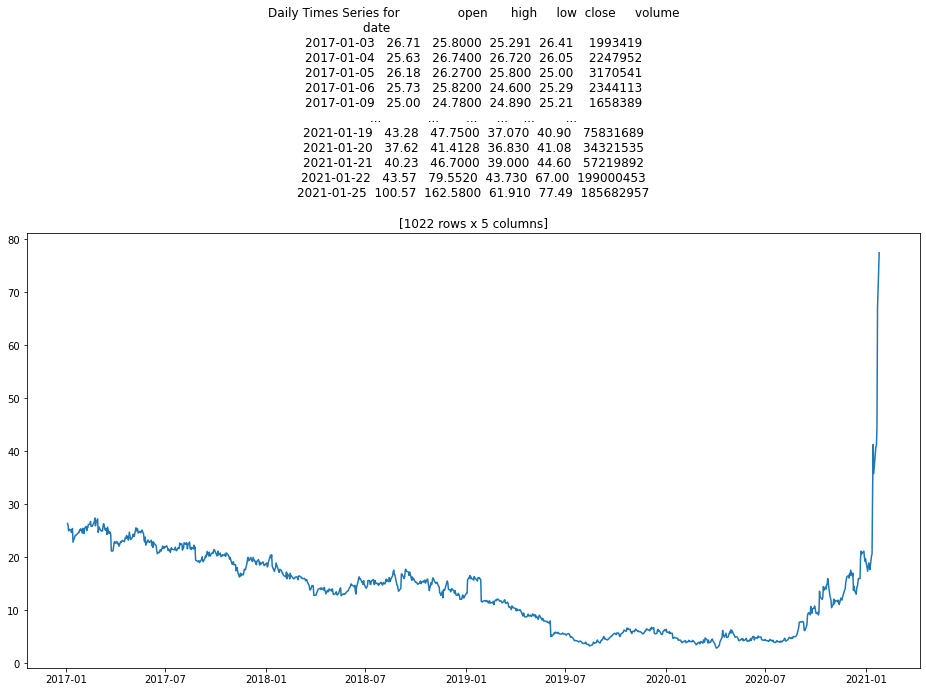

In [29]:
get_stock_chart("GME", start, end)

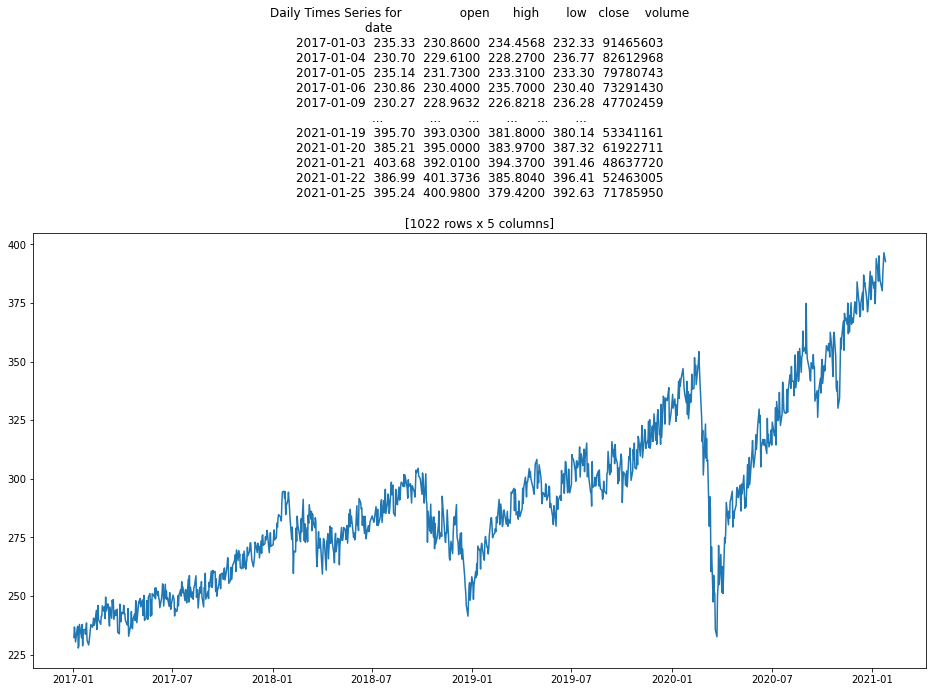

In [24]:
get_stock_chart("SPY", start, end)

In [25]:
# Status update

In [26]:
import requests

In [27]:
import env

In [28]:
r = requests.get(f"https://api.orats.io/datav2/cores?token={env.orats_token}&ticker=AAPL")
r.json()

{'message': 'Not Found.'}

In [36]:
from pandas.tseries.offsets import BDay

In [37]:
today_date = datetime.datetime.today()
print(today_date)

2021-01-26 12:17:01.050563


In [40]:
yesterday_date = (today_date - BDay(1))

In [42]:
from polygon import RESTClient


def main():
    key = env.polygon_test_key

    # RESTClient can be used as a context manager to facilitate closing the underlying http session
    # https://requests.readthedocs.io/en/master/user/advanced/#session-objects
    with RESTClient(key) as client:
        resp = client.stocks_equities_daily_open_close("AAPL", "2021-01-25")
        print(f"On: {resp.from_} Apple opened at {resp.open} and closed at {resp.close}")


if __name__ == '__main__':
    main()

On: 2021-01-25 Apple opened at 143.07 and closed at 142.92
